In [3]:
from google.colab import files
uploaded = files.upload()

import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['creditcard.csv']))
df.head()


Saving creditcard.csv to creditcard.csv


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Basic info
print(df.shape)
print(df.info())

# Class distribution
print(df['Class'].value_counts(normalize=True))

# Peek data
df.head()


(284807, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 2

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
from sklearn.preprocessing import StandardScaler

if 'Time' in df.columns:
    df = df.drop(columns=['Time'])

X = df.drop(columns=['Class'])
y = df['Class']

scaler = StandardScaler()
if 'Amount' in X.columns:
    X['Amount'] = scaler.fit_transform(X[['Amount']])


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)
print("Class distribution in train:\n", y_train.value_counts(normalize=True))


Train shape: (227845, 29) Test shape: (56962, 29)
Class distribution in train:
 Class
0    0.998271
1    0.001729
Name: proportion, dtype: float64


In [10]:
# Faster Random Forest
rf = RandomForestClassifier(
    n_estimators=100,  # fewer trees
    max_depth=10,      # limit depth
    random_state=42,
    n_jobs=-1
)

# Faster XGBoost
xgb = XGBClassifier(
    n_estimators=100,   # fewer boosting rounds
    max_depth=6,        # shallower trees
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    n_jobs=4
)


In [13]:
# Train Random Forest with SMOTE (lighter version)
rf_sm = RandomForestClassifier(
    n_estimators=100,   # fewer trees
    max_depth=10,       # shallower trees
    random_state=42,
    n_jobs=-1
)
rf_sm.fit(X_train_sm, y_train_sm)

y_pred_rf_sm = rf_sm.predict(X_test)
y_proba_rf_sm = rf_sm.predict_proba(X_test)[:,1]

print("\n=== Random Forest (with SMOTE) ===")
print(classification_report(y_test, y_pred_rf_sm, digits=4))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_rf_sm))

# Train XGBoost with SMOTE (lighter version)
xgb_sm = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    n_jobs=4
)
xgb_sm.fit(X_train_sm, y_train_sm)

y_pred_xgb_sm = xgb_sm.predict(X_test)
y_proba_xgb_sm = xgb_sm.predict_proba(X_test)[:,1]

print("\n=== XGBoost (with SMOTE) ===")
print(classification_report(y_test, y_pred_xgb_sm, digits=4))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_xgb_sm))



=== Random Forest (with SMOTE) ===
              precision    recall  f1-score   support

           0     0.9998    0.9980    0.9989     56864
           1     0.4286    0.8571    0.5714        98

    accuracy                         0.9978     56962
   macro avg     0.7142    0.9276    0.7852     56962
weighted avg     0.9988    0.9978    0.9982     56962

ROC-AUC: 0.977653807724553

=== XGBoost (with SMOTE) ===
              precision    recall  f1-score   support

           0     0.9998    0.9969    0.9983     56864
           1     0.3282    0.8776    0.4778        98

    accuracy                         0.9967     56962
   macro avg     0.6640    0.9372    0.7381     56962
weighted avg     0.9986    0.9967    0.9974     56962

ROC-AUC: 0.9738651404568581


In [15]:
# Baseline RF
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

# Baseline XGB
xgb = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    n_jobs=4
)
xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=4,
              num_parallel_tree=None, ...)

In [16]:
summary = []

def get_scores(name, y_true, y_pred, y_proba):
    from sklearn.metrics import precision_score, recall_score, f1_score
    summary.append({
        "Model": name,
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1-score": f1_score(y_true, y_pred),
        "ROC-AUC": roc_auc_score(y_true, y_proba)
    })

# Collect results
get_scores("RF (no SMOTE)", y_test, rf.predict(X_test), rf.predict_proba(X_test)[:,1])
get_scores("XGB (no SMOTE)", y_test, xgb.predict(X_test), xgb.predict_proba(X_test)[:,1])
get_scores("RF (SMOTE)", y_test, y_pred_rf_sm, y_proba_rf_sm)
get_scores("XGB (SMOTE)", y_test, y_pred_xgb_sm, y_proba_xgb_sm)

results = pd.DataFrame(summary)
print("\n=== Performance Comparison ===")
print(results)



=== Performance Comparison ===
            Model  Precision    Recall  F1-score   ROC-AUC
0   RF (no SMOTE)   0.939759  0.795918  0.861878  0.974791
1  XGB (no SMOTE)   0.925926  0.765306  0.837989  0.956450
2      RF (SMOTE)   0.428571  0.857143  0.571429  0.977654
3     XGB (SMOTE)   0.328244  0.877551  0.477778  0.973865


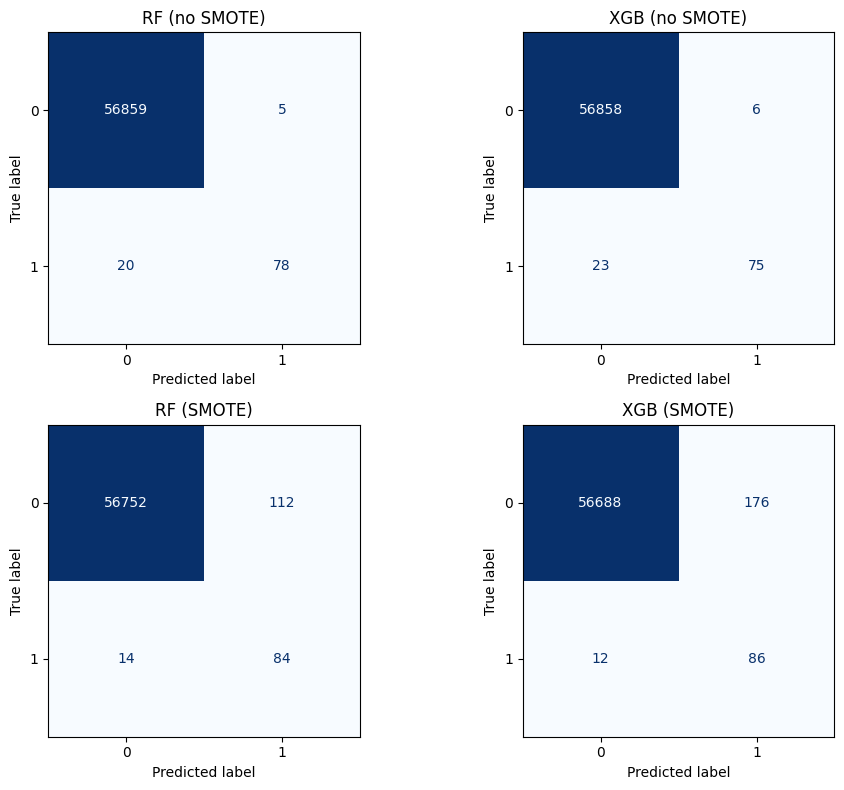

In [17]:
models = [
    ("RF (no SMOTE)", rf, X_test),
    ("XGB (no SMOTE)", xgb, X_test),
    ("RF (SMOTE)", rf_sm, X_test),
    ("XGB (SMOTE)", xgb_sm, X_test)
]

plt.figure(figsize=(10,8))
for i, (name, model, Xte) in enumerate(models, 1):
    plt.subplot(2,2,i)
    cm = confusion_matrix(y_test, model.predict(Xte))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
    disp.plot(ax=plt.gca(), cmap=plt.cm.Blues, colorbar=False)
    plt.title(name)
plt.tight_layout()
plt.show()


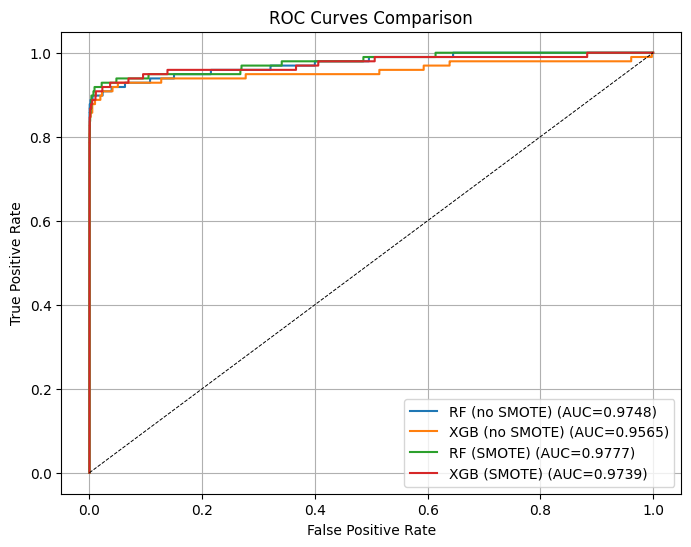

In [18]:
plt.figure(figsize=(8,6))

for name, model, Xte in models:
    y_proba = model.predict_proba(Xte)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.4f})")

plt.plot([0,1],[0,1],'k--', linewidth=0.7)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves Comparison")
plt.legend()
plt.grid(True)
plt.show()



=== Performance Comparison ===


,Model,Precision,Recall,F1-score,ROC-AUC
0,RF (no SMOTE),0.939759,0.795918,0.861878,0.974791
1,XGB (no SMOTE),0.925926,0.765306,0.837989,0.956450
2,RF (SMOTE),0.428571,0.857143,0.571429,0.977654
3,XGB (SMOTE),0.328244,0.877551,0.477778,0.973865


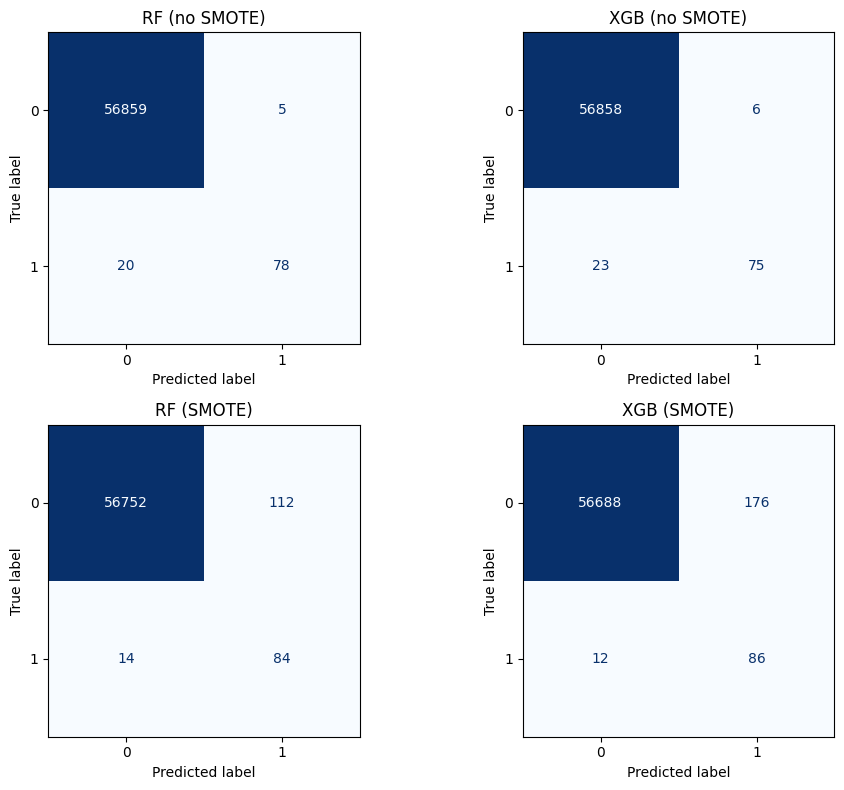

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# -----------------------------
# 1️⃣ Performance Table
# -----------------------------
summary = []

def get_scores(name, y_true, y_pred, y_proba):
    from sklearn.metrics import precision_score, recall_score, f1_score
    summary.append({
        "Model": name,
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1-score": f1_score(y_true, y_pred),
        "ROC-AUC": roc_auc_score(y_true, y_proba)
    })

# Collect results
get_scores("RF (no SMOTE)", y_test, rf.predict(X_test), rf.predict_proba(X_test)[:,1])
get_scores("XGB (no SMOTE)", y_test, xgb.predict(X_test), xgb.predict_proba(X_test)[:,1])
get_scores("RF (SMOTE)", y_test, y_pred_rf_sm, y_proba_rf_sm)
get_scores("XGB (SMOTE)", y_test, y_pred_xgb_sm, y_proba_xgb_sm)

results = pd.DataFrame(summary)
print("\n=== Performance Comparison ===")
display(results)

# -----------------------------
# 2️⃣ Confusion Matrices
# -----------------------------
models = [
    ("RF (no SMOTE)", rf, X_test),
    ("XGB (no SMOTE)", xgb, X_test),
    ("RF (SMOTE)", rf_sm, X_test),
    ("XGB (SMOTE)", xgb_sm, X_test)
]

plt.figure(figsize=(10,8))
for i, (name, model, Xte) in enumerate(models, 1):
    plt.subplot(2,2,i)
    cm = confusion_matrix(y_test, model.predict(Xte))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
    disp.plot(ax=plt.gca(), cmap=plt.cm.Blues, colorbar=False)
    plt.title(name)
plt.tight_layout()
plt.show()
